# Build atomic models of DNA Origami

Start by setting up a few things

In [9]:
(ql:quickload "cl-json")

To load "cl-json":
  Load 1 ASDF system:
    cl-json
; Loading "cl-json"



("cl-json")

In [10]:
(ext:getcwd)

"/Users/meister/Development/origami/tommaso/"

In [11]:
(start-swank)

Swank is already running


NIL

In [4]:
(asdf:load-asd "/Users/meister/Development/origami/src/origami.asd")

#<DEFINE-OP >

In [5]:
(asdf:load-system :origami)

T

# Load the atomic structures of A-G, C-T, G-A, and T-C base pairs.

In [6]:
(origami::load-bases "base-pair-pdb-file/")

#<HASH-TABLE-EQL :count 4 :total-alist-entries 4 @0x114ae3c38> 

# Read origami from CadNano 1.0 files

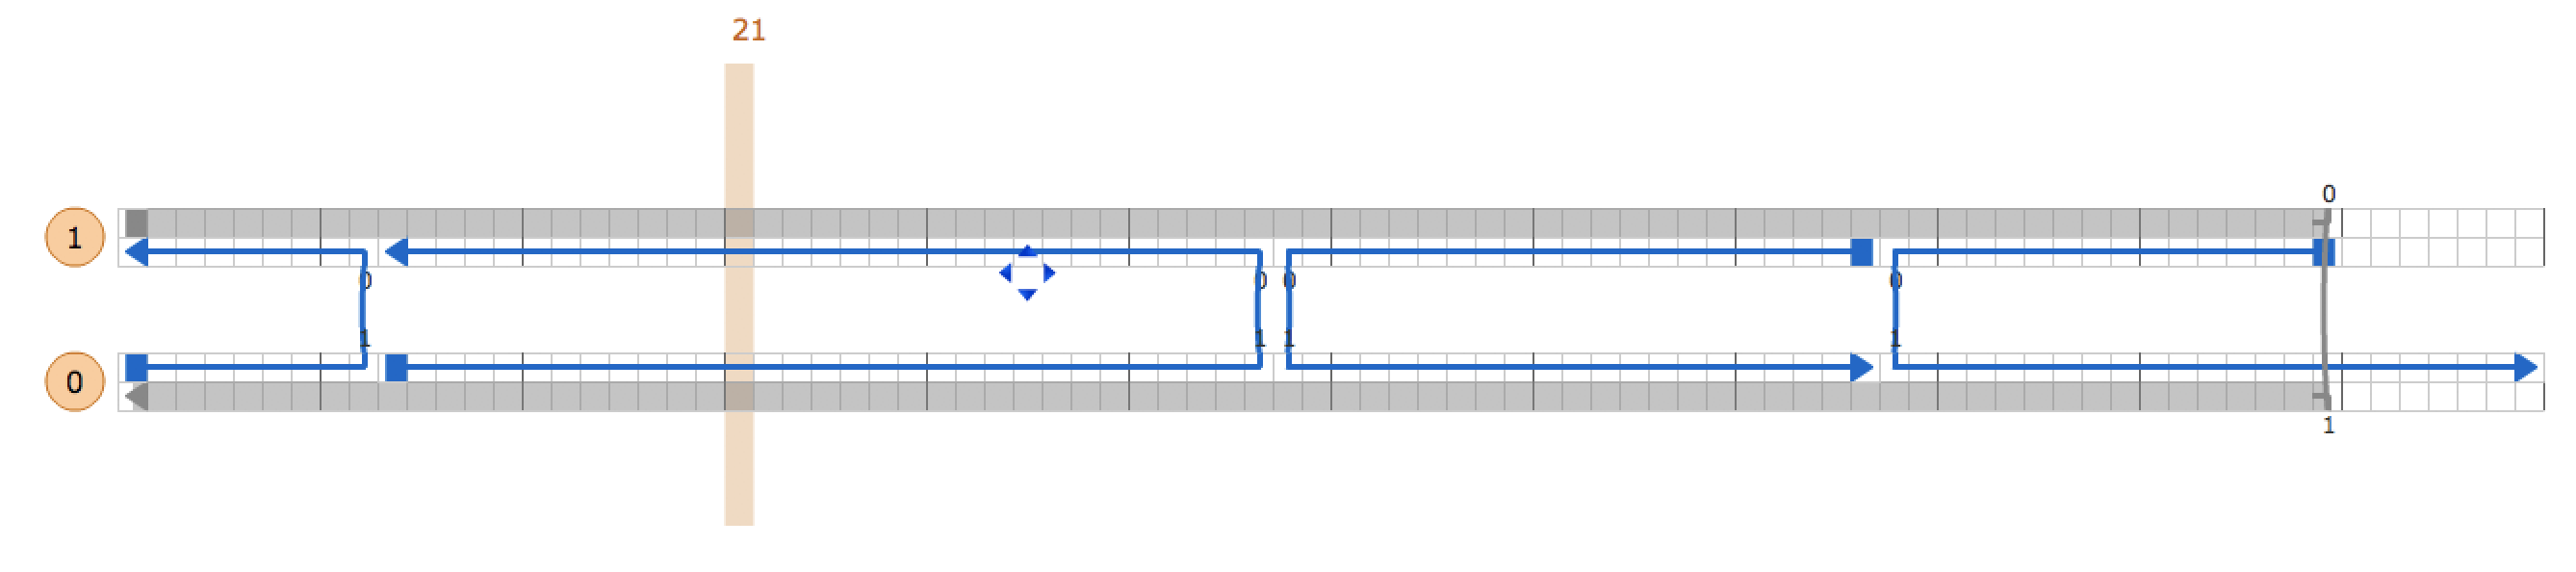

In [7]:
(cl-jupyter-user:png-from-file "alex-cadnano/Test5_slmsX2_Cnanorules.png")

In [8]:
(:= *origami* (origami::load-origami "alex-cadnano/Test5_slmsX2_Cnanorules.json"))

Starting parse-json
vstrand -> #<ORIGAMI::VSTRAND>
vstrand -> #<ORIGAMI::VSTRAND>
here
About to assign node-staple-sequences
duplex num 1
Starting function
Starting loop
duplex num 0
Starting function
Starting loop
About to apply node-staple-sequences
pairs -> ((J 1 SC 0) -> (J 1 SC 8)

          (J 1 SC 9) -> (J 1 SC 39)

          (J 1 SC 40) -> (J 1 SC 60)

          (J 1 SC 61) -> (J 1 SC 76)

          (J 0 ST 0) -> (J 0 ST 8)

          (J 0 ST 9) -> (J 0 ST 39)

          (J 0 ST 40) -> (J 0 ST 60)

          (J 0 ST 61) -> (J 0 ST 76)

          (J 0 SC 83) -> (J 0 SC 77)
)


SIMPLE-WARNING: 
No CSV; nucleobase information will be defaulted


*ORIGAMI*

In [267]:
(origami::parts *origami*)

(#<ORIGAMI::DOUBLE-STRANDED-DNA> #<ORIGAMI::DOUBLE-STRANDED-DNA>
 #<ORIGAMI::DOUBLE-STRANDED-DNA> #<ORIGAMI::DOUBLE-STRANDED-DNA>
 #<ORIGAMI::DOUBLE-STRANDED-DNA> #<ORIGAMI::DOUBLE-STRANDED-DNA>
 #<ORIGAMI::DOUBLE-STRANDED-DNA> #<ORIGAMI::DOUBLE-STRANDED-DNA>
 #<ORIGAMI::SINGLE-STRANDED-DNA>)

## Get a copy of a residue from the pdb structure

In [268]:
(:= *energy* (origami::build-energy-function *origami* :verbose t))

nonbond term strands -> (#<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::DOUBLE-STRANDED-DNA>
                         #<ORIGAMI::SINGLE-STRANDED-DNA>)  length -> 9
(length strand-vec): 9
num-nodes: 9  total-height: 26.56  z-offset: -13.28  znum: 3  zstep: 8.853333
Looking at strand id 0  nodes: 2  running-count: 2
num-nodes: 31  total-height: 99.6  z-offset: -49.8  znum: 10  zstep: 9.96
Looking at strand id 1  nodes: 9  running-count: 11
num-nodes: 21  total-height: 66.4  z-offset: -33.2  znum: 7  zstep: 9.485715
Looking at strand id 2  nodes: 6  running-count: 17
num-nodes: 16  total-height: 49.8  z-offset: -24.9  znum: 5  zstep

*ENERGY*

In [269]:
(:= *arrayed* (origami::arrayed-rigid-body-energy-function-position *energy* :separation 20.0))

*ARRAYED*

In [270]:
(chem:number-of-terms (origami::staple-term *energy*))

12

In [271]:
(:= *aa* (origami::build-pseudo-aggregate *energy* *arrayed*))

*AA*

In [272]:
(:= aas (show *aa*)) aas

A Jupyter Widget

In [273]:
(origami::add-shapes-for-energy aas *energy* *arrayed*)

T

--------
# Use energy minimization to determine the structure

In [283]:
(:= *pos* (origami::randomize-rigid-body-energy-function-position *energy*))

*POS*

In [284]:
(:= *start-agg* (origami::build-pseudo-aggregate *energy* *pos*))

*START-AGG*

Show the random starting point

In [285]:
(show *start-agg*)

A Jupyter Widget

In [286]:
(:= *trajectory* (nglv::make-cando-trajectory *start-agg*))

*TRAJECTORY*

Minimize with nonbonded terms off

In [287]:
(origami::origami-optimize *energy* *pos* :trajectory *trajectory* :nonbond-on nil)

minimize-no-fail
======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Dir-------------Energy-----------RMSforce
 minSDnP       0     1      -inf   0.0              0.000        1739706.870
 minSDnP       0     2    -15.56   0.0       53342115.865         748537.237
 minSDnP       0     3    -15.10   0.0       48183820.288         423137.074
 minSDnP       0     4    -15.18   0.0       46726280.248         247603.554
 minSDnP       0     5    -14.96   0.0       46104300.002         226674.916
 minSDnP       0     6    -15.15   0.0       45670860.985         167656.350
 minSDnP       0     7    -14.99   0.0       45396921.206         143839.456
 minSDnP       0     8    -15.18   0.0       45230223.568         109351.680
 minSDnP       0     9    -14.88   0.0       45101496.143         117131.827
 minSDnP       0    10    -15.18   0.0       44990773.307          97440.329
---Stage-Seconds--Step-log(Alpha)--Dir-------------Energy-----------RMSforce
 minSDnP       

SIMPLE-WARNING: 
The minimizer reported: #<CHEM:MINIMIZER-EXCEEDED-MAX-STEPS>


NIL

Minimize with nonbonded terms on

In [288]:
(origami::origami-optimize *energy* *pos* :trajectory *trajectory* :nonbond-on t)

minimize-no-fail
======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(81671.472835).LT.forceTolerance(10000000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-log(Alpha)--Dir-------------Energy-----------RMSforce
 minCGnP       0     1      -inf   0.0              0.000          81671.473
 minCGnP       0     2    -15.34  22.8        5135736.792          34313.757
 minCGnP       0     3    -14.38  34.5        5115312.524          25182.960
 minCGnP       0     4    -13.28  74.4        5076669.485          76383.316
 minCGnP       0     5    -14.38  72.2        4987028.306          69692.094
 minCGnP       0     6    -12.82  80.3        4638940.795         112314.806
 minCGnP       0     7    -12.84  85.1        3613505.624         150059.834
 minCGnP       0     8    -13.76  85.3        2705955.667         190277.798
 minCGnP       0     9    -14.89  85.1        2420734.742         124868.054
 minCGnP       0    10    -15.55  77

NIL

In [289]:
(:= *end-agg* (origami::build-pseudo-aggregate *energy* *pos*))

*END-AGG*

Show the final structure

In [290]:
(:= endv (show *end-agg*)) endv

A Jupyter Widget

In [291]:
(origami::add-shapes-for-energy endv *energy* *pos*)

T

Show the trajectory of the minimization using a slider

In [292]:
(:= traj (nglv::make-nglwidget :structure *trajectory* :gui :true)) traj

A Jupyter Widget

In [293]:
(defmethod my-observer (object name new old)
    (format *trace-output* "frame -> ~a~%" new)
    (setf (nglv::frame traj) new))

#<STANDARD-METHOD MY-OBSERVER (T T T T)>

In [294]:
(:= slider (make-instance 'cljw:int-slider :max (1- (nglv::n-frames *trajectory*)))) slider

A Jupyter Widget

Build an atomic model (atoms aren't bonded at this point)

In [295]:
(:= *mino* (origami::build-one-aggregate *origami* *energy* *pos*))

*MINO*

In [296]:
(:= *mino-view* (show *mino*)) *mino-view*

A Jupyter Widget

In [297]:
(nglv::add-representation *mino-view* "spacefill" )

T

# Solve the structure using monte carlo

In [298]:
(:= *mcpos* (origami::randomize-rigid-body-energy-function-position *energy*))

*MCPOS*

In [299]:
(:= *start-agg* (origami::build-pseudo-aggregate *energy* *mcpos*))

*START-AGG*

Show the random starting point

In [300]:
(show *start-agg*)

A Jupyter Widget

In [301]:
(:= *trajectory* (nglv::make-cando-trajectory *start-agg*))

*TRAJECTORY*

Carry out the monte carlo search

In [306]:
(setf *pos* (origami::monte-carlo *energy* 0.00000000000000001
                                    *mcpos* 10000 
                                  :trajectory *trajectory*
                                  :step-size 0.1
                                  :verbose t))

1  1114939.1848668458d0 : NIL
     mc(1.0d0)   <  random(0.1204803)
2  1040080.6720237104d0 : NIL
     mc(1.0d0)   <  random(0.6472977)
3  864911.635675573d0 : T
4  865380.5212327085d0 : NIL
     mc(0.999999999999998d0)   <  random(0.31360057)
5  980192.8749335964d0 : NIL
     mc(1.0d0)   <  random(0.42718863)
6  1110856.4446721645d0 : NIL
     mc(1.0d0)   <  random(0.0262807)
7  1121650.581775127d0 : NIL
     mc(1.0d0)   <  random(0.7626099)
8  859662.8870958171d0 : T
9  999349.0446784407d0 : NIL
     mc(1.0d0)   <  random(0.9894027)
10  1309702.6312628654d0 : NIL
     mc(1.0d0)   <  random(0.20621201)
11  983269.401307958d0 : NIL
     mc(1.0d0)   <  random(0.38507918)
12  2468554.3416210376d0 : NIL
     mc(1.0d0)   <  random(0.19909504)
13  938547.7210322043d0 : NIL
     mc(1.0d0)   <  random(0.33866677)
14  1024062.2205683648d0 : NIL
     mc(1.0d0)   <  random(0.45943278)
15  852770.1379818355d0 : T
16  1039225.958529078d0 : NIL
     mc(1.0d0)   <  random(0.8380332)
17  1203425.5999

#(5.46514814937917d0 -5.537193938861308d0 -3.4806331600152847d0
  2.0235436062325864d0 67.05463829636574d0 -51.65031373500824d0
  -41.53228756785393d0 -2.0763582654205863d0 1.3985769794066392d0
  -0.5128146038649106d0 -6.831757472947803d0 52.58383887261152d0
  -12.974702954292297d0 0.7719405815005302d0 -10.920269922022158d0
  -4.743953787402066d0 12.492659005579231d0 0.5011607650632408d0
  11.431273475289345d0 -23.607200652360916d0 43.011018216609955d0
  1.6747804970529807d0 -1.1754131165023392d0 6.734818715218516d0
  3.1568646400418925d0 -19.309619158506393d0 -7.3275942876935005d0
  18.930451653897762d0 4.387922364696097d0 -2.695888147284001d0
  7.417096979890191d0 7.525643960637014d0 57.00273925065994d0
  -70.93428986519575d0 -32.595154359936714d0 6.239821858758356d0
  -1.8536331216546698d0 -0.2171512111201297d0 1.81394438490753d0
  55.690210819244385d0 -33.05899564921856d0 8.498181499540806d0
  -1.4290634152333492d0 -6.133283220595036d0 -0.6386381794226921d0
  4.480951156328844d0 26

In [307]:
(:= *b* (origami::build-one-aggregate *origami* *energy* *mcpos*))

*B*

Show a cartoon model of the structure that represents the rigid body energy function

In [308]:
(:= wb (show *b*)) wb

A Jupyter Widget

In [309]:
(origami::add-shapes-for-energy wb *energy* *mcpos*)

T

In [310]:
(:= *mcpos-agg* (origami::build-one-aggregate *origami* *energy* *mcpos*))

*MCPOS-AGG*

In [311]:
(:= *mcpos-view* (show *mcpos-agg*)) *mcpos-view*

A Jupyter Widget

In [312]:
(nglv::add-representation *mcpos-view* "ball+stick")

T

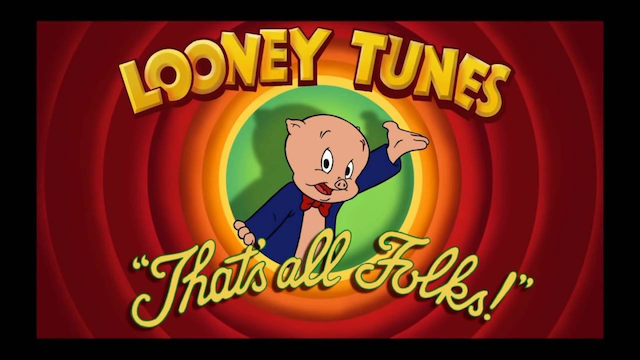

In [313]:
(cl-jupyter-user:png-from-file "alex-cadnano/thatsall.png")